## Normal Q10

In [8]:
from scipy.integrate import quad
import math

def helper(y):
    return math.sin(y) * math.sin(y) / (y * y)

def integrand(epsilon):
    integral_value, _ = quad(helper, 0, epsilon)
    return integral_value

def fix_point_function(epsilon):
    return 3 / math.pi * integrand(epsilon) - 1 - 3 / (2 * epsilon * math.sqrt(2))

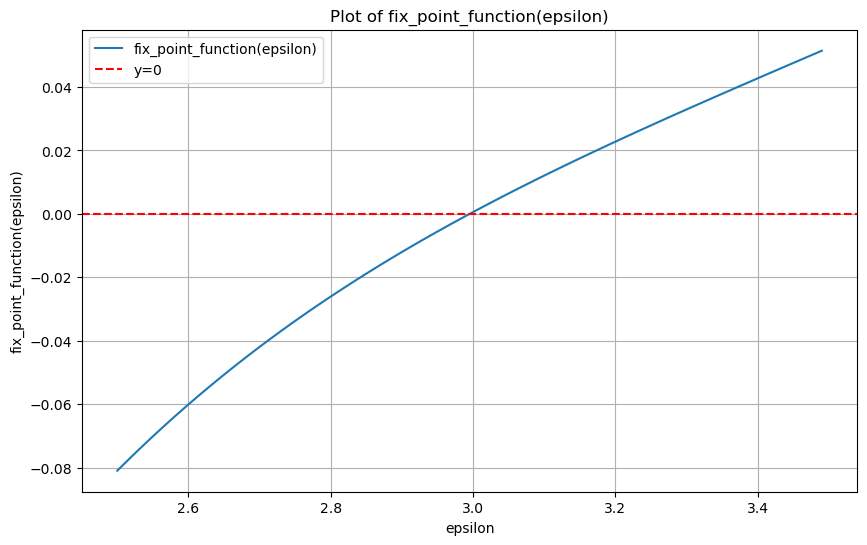

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate epsilon values from 2.5 to 3.5 with a step of 0.01
epsilon_values = np.arange(2.5, 3.5, 0.01)
fix_point_values = [fix_point_function(eps) for eps in epsilon_values]

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, fix_point_values, label="fix_point_function(epsilon)")
plt.axhline(y=0, color='red', linestyle='--', label="y=0")  # Add horizontal red line at y=0
plt.xlabel("epsilon")
plt.ylabel("fix_point_function(epsilon)")
plt.title("Plot of fix_point_function(epsilon)")
plt.grid(True)
plt.legend()
plt.show()

### Method 1: Bisection method

In [17]:
def bisection_method(low=2.5, high=3.5, err_tolerance=1e-5):
    while True:
        mid = (high + low) / 2
        err = fix_point_function(mid)
        if abs(err) < err_tolerance:
            return mid
        if err > 0:
            high = mid
        else:
            low = mid

print(bisection_method())

2.9951171875


### Method 2: Newton method

In [19]:
def f_prime_x(x):
    return 3 / math.pi * math.sin(x) * math.sin(x) / (x * x) + 3 / (2 * x * x * math.sqrt(2))

def newton_method(initial_guess = 3.0, err_tolerance=1e-5):
    x = initial_guess
    while True:
        f_x = fix_point_function(x)
        if abs(f_x) < err_tolerance:
            return x
        x = x - f_x / (f_prime_x(x))

print(newton_method())

2.9951326252643073


## Change Q10 to adapt to Q11

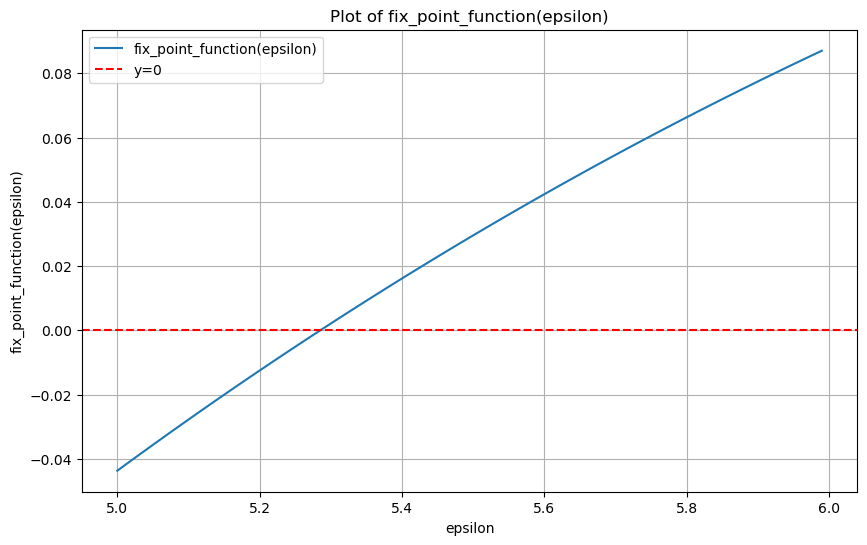

In [22]:
from scipy.integrate import quad
import math

def helper(y):
    return math.sin(y) * math.sin(y) / (y * y)

def integrand(epsilon):
    integral_value, _ = quad(helper, 0, epsilon / math.pi)
    return integral_value

def fix_point_function(epsilon):
    return 3 / math.pi * integrand(epsilon) - 1 - 3 / (2 * epsilon * math.sqrt(2))

import numpy as np
import matplotlib.pyplot as plt

# Generate epsilon values from 2.5 to 3.5 with a step of 0.01
epsilon_values = np.arange(5, 6, 0.01)
fix_point_values = [fix_point_function(eps) for eps in epsilon_values]

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, fix_point_values, label="fix_point_function(epsilon)")
plt.axhline(y=0, color='red', linestyle='--', label="y=0")  # Add horizontal red line at y=0
plt.xlabel("epsilon")
plt.ylabel("fix_point_function(epsilon)")
plt.title("Plot of fix_point_function(epsilon)")
plt.grid(True)
plt.legend()
plt.show()

### Method 1: Bisection method

In [24]:
def bisection_method(low=5.0, high=6.0, err_tolerance=1e-5):
    while True:
        mid = (high + low) / 2
        err = fix_point_function(mid)
        if abs(err) < err_tolerance:
            return mid
        if err > 0:
            high = mid
        else:
            low = mid

print(bisection_method())

5.28515625


### Method 2: Newton method

In [25]:
def f_prime_x(x):
    return 3 * math.sin(x/math.pi) * math.sin(x/math.pi) / (x * x) + 3 / (2 * x * x * math.sqrt(2))

def newton_method(initial_guess = 5.0, err_tolerance=1e-5):
    x = initial_guess
    while True:
        f_x = fix_point_function(x)
        if abs(f_x) < err_tolerance:
            return x
        x = x - f_x / (f_prime_x(x))

print(newton_method())

5.285137416001143
